# Data Objects

To begin with, as we have seen in the prvious chapter, we have to express what to analyze, the data. We will introduce some basic data objects here.

If you need to know more about the data, see also [Data Illustration](https://nshimizu0721.github.io/molass-essence/chapters/01/data-illust.html).

## Learning Points

In this chapter, you will learn about:

* Importing necessary modules
* SEC-SAXS data objects
* How to plot data
* Elution curves
* Spectral curves


## SEC-SAXS Data

In [1]:
from molass import get_version
assert get_version() >= '0.2.0', "This tutorial requires molass version 0.2.0 or higher."
import matplotlib.pyplot as plt
from molass_data import SAMPLE1

The following code loads a data set from a SEC-SAXS experiment and displays a 3D plot of the dataset. This helps visualize the relationship between elution time, scattering angle, and intensity.

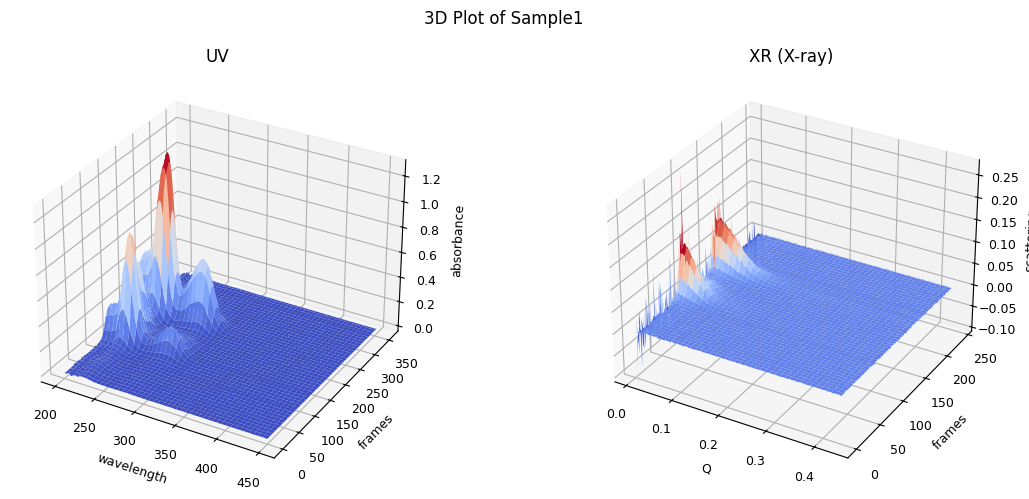

In [2]:
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
ssd.plot_3d(title="3D Plot of Sample1");

In the 3D plot, you understand the whole structure of the data set and how it changes over time. Note that `SAMPLE1` variable has the folder path where the tutorial data set is located.

It is often more handy if you see it in a compact 2D plot as follows.

zeros at the angular ends of error data have been replaced with the adjacent values.


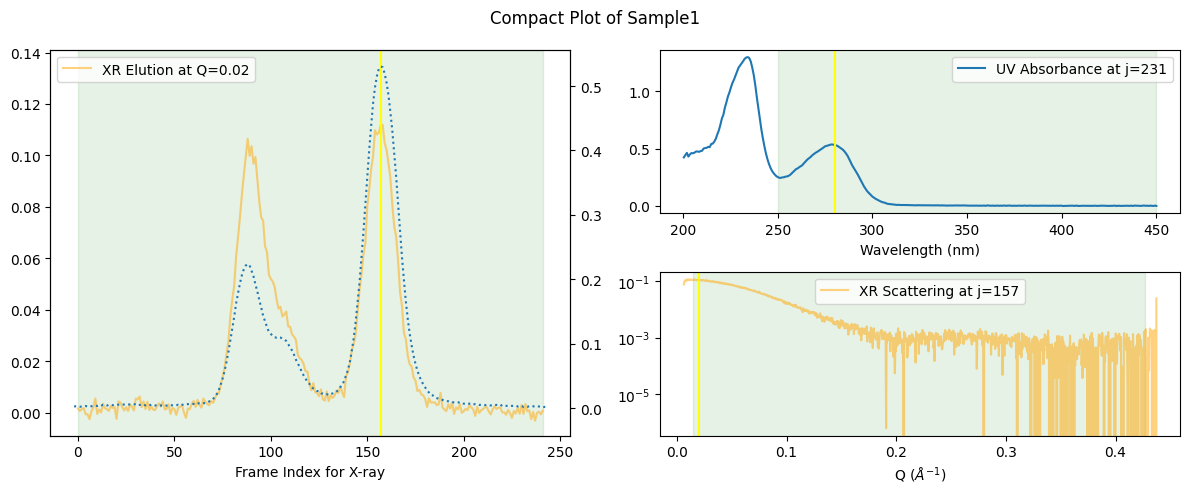

In [3]:
ssd.plot_compact(title="Compact Plot of Sample1");

Note that the yellow vertical lines indicate the positions where other 2D plots have picked the data to draw.

Note also that this compact plot is possible only after the temporal mapping[^1] between UV and XR (X-ray) data has been established, which can be easily understood when you remind the fact that frame indecies for UV ranged between 0 and 600.

[^1]: For details on this mapping, see [Mapping between UV and X-ray Data](https://freesemt.github.io/molass-technical/chapters/30/mapping.html).

Observing the following plot, confirm the ralation between the 3D and 2D plots.

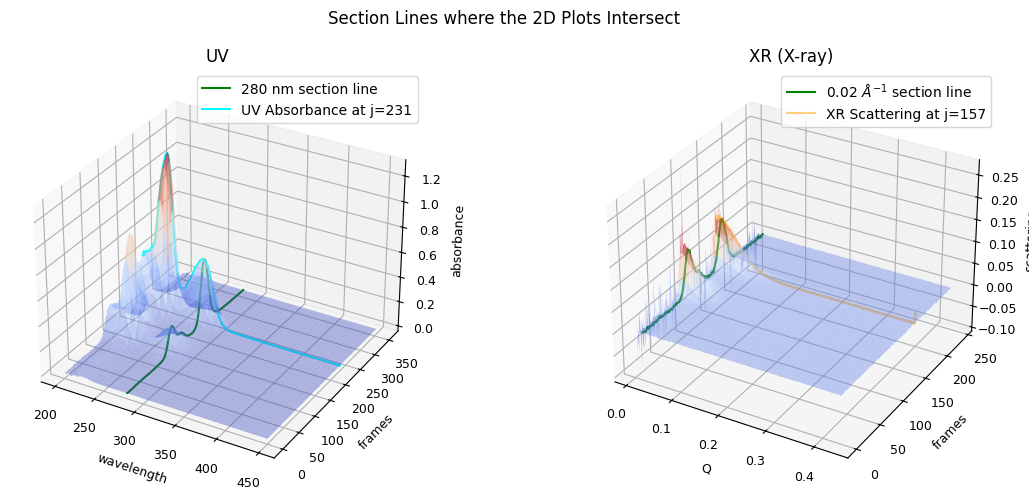

In [4]:
ssd.plot_3d(title="Section Lines where the 2D Plots Intersect", with_2d_section_lines=True);

To summarize, SSD (SEC-SAXS Data Set) objects provide basic utilities to grasp the data set as a whole and serve as the starting point of your analysis, from where you can derive subsequent objects required for further analysis. We will explore some of such derivations and basic matplotlib usages for them in the following sections.

## Elution Curves

An **elution curve** shows how the signal (such as absorbance or scattering intensity) changes as a function of elution time or eluted volume during a chromatography experiment. In SEC-SAXS, both UV absorbance and X-ray intensity elution curves are observed.

Let's extract and plot the elution curves for both X-ray scattering and UV absorbance.

For X-ray data, elution curves are picked, by default, at Q=0.02 [Å⁻¹].

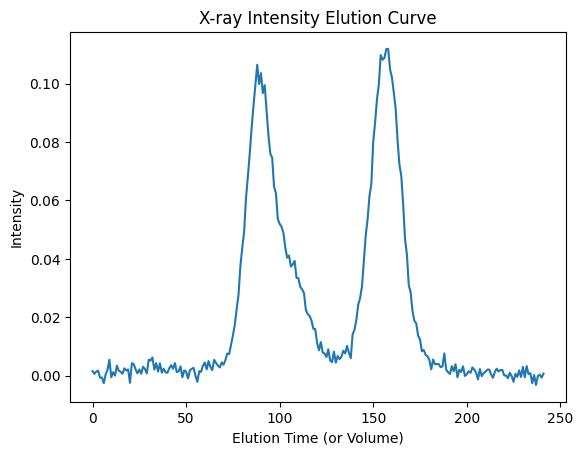

In [5]:
xr_icurve = ssd.xr.get_icurve()
plt.plot(xr_icurve.x, xr_icurve.y)
plt.title('X-ray Intensity Elution Curve')
plt.xlabel('Elution Time (or Volume)')
plt.ylabel('Intensity')
plt.show()

For UV data, elution curves are picked, by default, at wavelength=280 [nm].

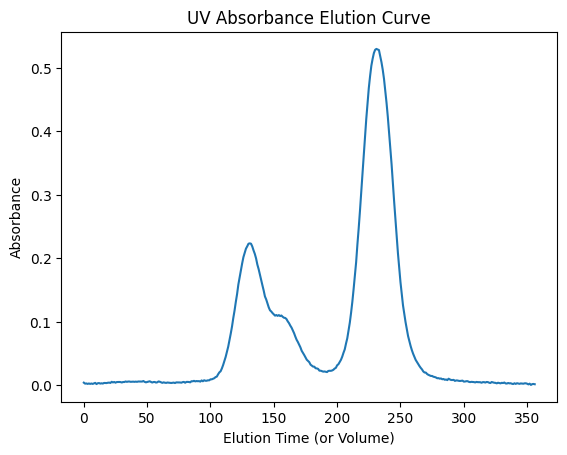

In [6]:
uv_icurve = ssd.uv.get_icurve()
plt.plot(uv_icurve.x, uv_icurve.y)
plt.title('UV Absorbance Elution Curve')
plt.xlabel('Elution Time (or Volume)')
plt.ylabel('Absorbance')
plt.show()

Another plot example with two subplots: one for the X-ray scattering elution curve and one for the UV absorbance elution curve.

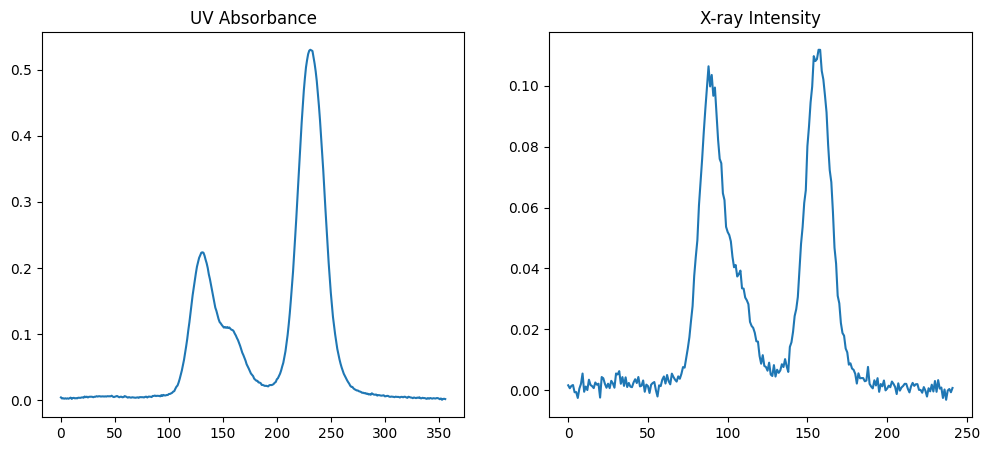

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(uv_icurve.x, uv_icurve.y)
ax1.set_title('UV Absorbance')
ax2.plot(xr_icurve.x, xr_icurve.y)
ax2.set_title('X-ray Intensity')
plt.show()

## Peak Positions

To analyze the data further, let's find the peak positions in both elution curves. We use **integer array indexing** for NumPy arrays to highlight the peaks.

In [8]:
uv_peaks = uv_icurve.get_peaks()
xr_peaks = xr_icurve.get_peaks()
uv_peaks, xr_peaks

([131, 231], [88, 157])

Now, let's plot the elution curves again and mark the peak positions.

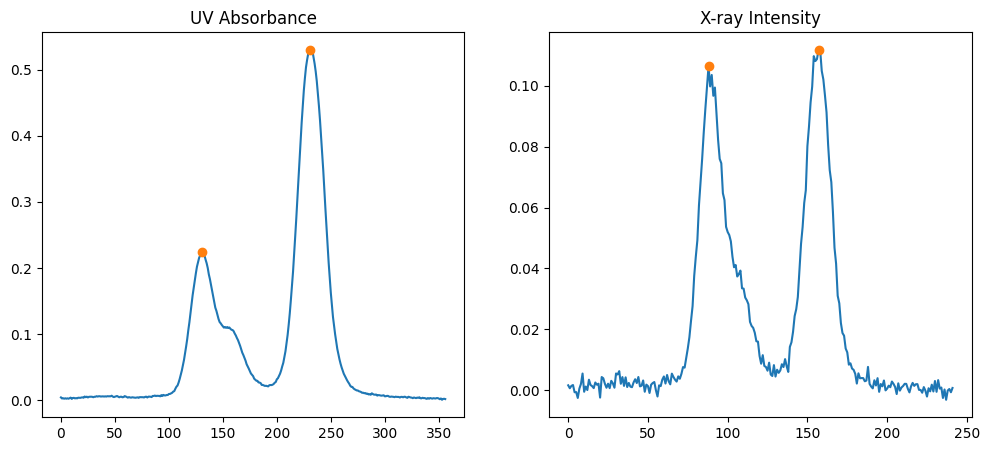

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(uv_icurve.x, uv_icurve.y)
ax1.plot(uv_icurve.x[uv_peaks], uv_icurve.y[uv_peaks], 'o', label='Peaks')
ax1.set_title('UV Absorbance')
ax2.plot(xr_icurve.x, xr_icurve.y)
ax2.plot(xr_icurve.x[xr_peaks], xr_icurve.y[xr_peaks], 'o', label='Peaks')
ax2.set_title('X-ray Intensity')
plt.show()

The circles on the plots indicate the detected peak positions.

* [Colors in the default property cycle](https://matplotlib.org/stable/gallery/color/color_cycle_default.html)

## Spectral Curves

```{note}
Here, we use "spectral" to mean either of the following two types of curves, for simplicity.
```

### Absorbance Spectra

For each detected peak in the UV absorbance elution curve, let's plot the corresponding absorbance spectrum.

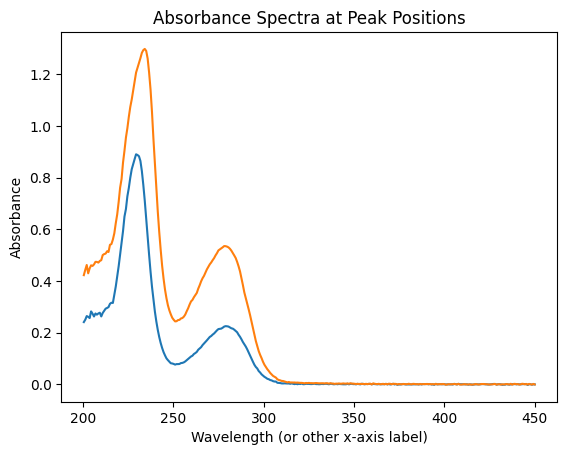

In [10]:
for j in uv_peaks:
    uv_jcurve = ssd.uv.get_jcurve(j=j)
    plt.plot(uv_jcurve.x, uv_jcurve.y)
plt.title('Absorbance Spectra at Peak Positions')
plt.xlabel('Wavelength (or other x-axis label)')
plt.ylabel('Absorbance')
plt.show()

### Scattering Curves

Similarly, for each detected peak in the X-ray scattering elution curve, let's plot the corresponding scattering curve.

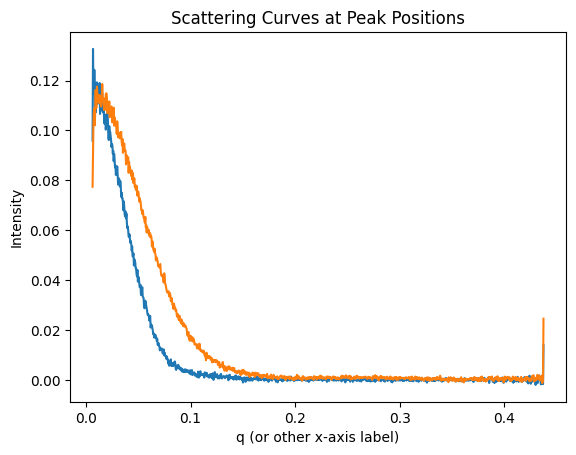

In [11]:
for j in xr_peaks:
    xr_jcurve = ssd.xr.get_jcurve(j=j)
    plt.plot(xr_jcurve.x, xr_jcurve.y)
plt.title('Scattering Curves at Peak Positions')
plt.xlabel('q (or other x-axis label)')
plt.ylabel('Intensity')
plt.show()

```{note}
You may have noticed that the curves include negative values which are invalid. The treatment of those values will be discussed in the following chapter.  
```

We use `plt.subplots` here because there is no `plt.set_yscale()` function. Let's plot the scattering curves on a logarithmic y-scale for better visualization.

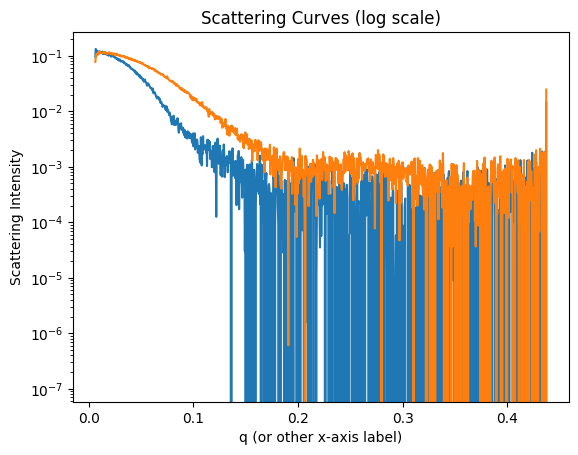

In [12]:
fig, ax = plt.subplots()
ax.set_yscale('log')
for j in xr_peaks:
    xr_jcurve = ssd.xr.get_jcurve(j=j)
    ax.plot(xr_jcurve.x, xr_jcurve.y)
ax.set_title('Scattering Curves (log scale)')
ax.set_xlabel('q (or other x-axis label)')
ax.set_ylabel('Scattering Intensity')
plt.show()

## Python Basics

We assume you are already familiar with Python basics. If not, see the following pages for example.

* [Introduction to Python - QuTiP Tutorial](https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/python-introduction/001_Beginning_Python.ipynb)
* [Introduction to NumPy Arrays - QuTiP Tutorial](https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/python-introduction/002_NumPy_Array_Basics.ipynb)